In [1]:
import numpy as np
import pandas as pd

# import data

In [6]:
df =pd.read_csv("/home/yulius/Latihan-Data-Science/Data/customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Tentukan jumlah cluster

k-prototype gabungan K-modes dan K-means

In [7]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

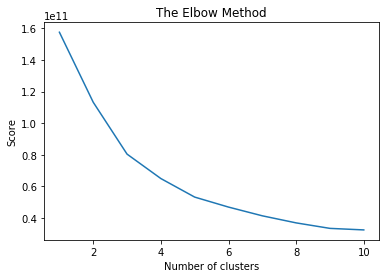

In [9]:
score = []
for i in tqdm(range(1, 11)):
    model = KPrototypes(n_clusters = i)
    model.fit(df, categorical=[0,1])
    score.append(model.cost_)
    
plt.plot(range(1, 11), score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

# Training

In [12]:
model = KPrototypes(n_clusters = 3)
member= model.fit_predict(df, categorical=[0,1])

In [13]:
df_pred = df.copy()
df_pred["cluster"] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


# Analyze Cluster

In [14]:
num, cat = model.cluster_centroids_

In [15]:
df_cat = pd.DataFrame(cat, columns=df.columns[:2])
df_num = pd.DataFrame(num, columns=df.columns[2:])
df_cat.join(df_num)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000
1,1,3,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970
2,1,3,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667


In [16]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

cluster 0 : typical orang yang belanja milk, grocery, dan detergens<br>
cluster 1 : orang hemat<br>
cluster 2 : customer suka beli fresh food<br>

# Popular conventional approach

melakukan customer segmentatin tier sederhana menggunakan **RFM(Recency- Frequency -Monetary)**
- Recency = Seberapa recent transaksinya
- Frequency = seberapa sering transaksi
- MOnetary = seberapa besar transaksinya